##ٍA CNN Prediction Approach For Japan Seismic Activites##



---


Notebook by : Arad HamidSamiee

*Find the paper at http://www.nnw.cz/doi/2018/NNW.2018.28.009.pdf written by : JP. Huang & XA. Wang & Y. Zhao & C. Xin & H. Xiang*

#***Pre-processing***#
This Notebook contains the pre-processing method taken on seismic activity Data of Taiwan


1. Upload your raw seismic events dataset (as csv) and rename it to "Dataset". (The segment below will create an error message in case of a missing file)


---



In [ ]:
try:
  file = open("Dataset.csv")
  print("Great, it exists:", file)
except:
  print("No such file, try again!")

Great, it exists: <_io.TextIOWrapper name='Dataset.csv' mode='r' encoding='UTF-8'>




---


2. Make sure you have included these features in your set (separately):
*   Date & Time
*   Latitude & Longitude
*   Magnitude
*   Depth (preferably)

The segment below will acknowledge which features it finds and which it fails to.

---



In [ ]:
with file:
    first_line = file.readline()
Features = first_line.split(',')

# Removing the new line from the last element
LastEl = Features[-1].split('\n')[0]
Features[-1] = LastEl
Features

['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']



---

*(So far we have a list of all Features in the set, now all that needs to be done is finding the features mensioned above. Fot that matter we first standardize those titles and then begine to do somewhat of a blind search.)*

###**This step is important since we extract features we need and create a dictionary out of them.**###


---



In [ ]:
# Normalizing feature titles by capitalizing and replacing them in features list.
c = 0
for feature in Features:
    Features[c] = feature.upper()
    c += 1
print(Features, end='\n\n')

FeaturesDict = dict()

if 'DATE' in Features:
    print("\t+ DATE exists.")
    FeaturesDict['DATE'] = list()
else:
    print("\t- DATE was not found.")

if 'TIME' in Features:
    print("\t+ TIME exists.")
    FeaturesDict['TIME'] = list()
else:
    print("\t- TIME was not found.")

if 'LATITUDE' in Features or 'LAT' in Features:
    print("\t+ LATITUDE exists.")
    FeaturesDict['LATITUDE'] = list()
else:
    print("\t- LATITUDE was not found.")

if 'LONGITUDE' in Features or 'LONG' in Features:
    print("\t+ LONGITUDE exists.")
    FeaturesDict['LONGITUDE'] = list()
else:
    print("\t- LONGITUDE was not found.")

if 'MAGNITUDE' in Features or 'MAG' in Features:
    print("\t+ MAGNITUDE exists.")
    FeaturesDict['MAGNITUDE'] = list()
else:
    print("\t- MAGNITUDE was not found.")

if 'DEPTH' in Features or 'DPT' in Features or 'DP' in Features:
    print("\t+ DEPTH exists as well.")
    FeaturesDict['DEPTH'] = list()
else:
    print("\t- DEPTH was not found.")


['DATE', 'TIME', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'MAGNITUDE']

	+ DATE exists.
	+ TIME exists.
	+ LATITUDE exists.
	+ LONGITUDE exists.
	+ MAGNITUDE exists.
	+ DEPTH exists as well.


##Filling the created dictionary accordingly##
There is room for enhancing the code segment below by reserving indexes of each column to reference while extracting data from the set. (maybe I'll add it later? idk)

In [ ]:
file = open("Dataset.csv")
for record in file:
    segments = record.split(',')
    FeaturesDict["DATE"].append(segments[0])
    FeaturesDict["TIME"].append(segments[1])
    FeaturesDict["LATITUDE"].append(segments[2])
    FeaturesDict["LONGITUDE"].append(segments[3])
    FeaturesDict["DEPTH"].append(segments[4])
    FeaturesDict["MAGNITUDE"].append(segments[5])

# cleaning the dict() the hard way
FeaturesDict["DATE"].pop(0)
FeaturesDict["TIME"].pop(0)
FeaturesDict["LATITUDE"].pop(0)
FeaturesDict["LONGITUDE"].pop(0)
FeaturesDict["DEPTH"].pop(0)
FeaturesDict["MAGNITUDE"].pop(0)

# removing the '\n' the hardway
m = 0
for i in FeaturesDict["MAGNITUDE"]:
    c = i.split('\n')[0]
    FeaturesDict["MAGNITUDE"][m] = c
    m += 1

print("DONE!")

DONE!


In [ ]:
import sys
sys.getsizeof(FeaturesDict)

376

##Determining the danger zones of Japan

In [ ]:
DangerZone = {
    'DATE':list(),
    'TIME':list(),
    'LATITUDE':list(),
    'LONGITUDE':list(),
    'MAGNITUDE':list(),
    'DEPTH':list(),
}

for i in range(len(FeaturesDict['DATE'])):
    if float(FeaturesDict['MAGNITUDE'][i]) >= 7:
        DangerZone['DATE'].append(FeaturesDict['DATE'][i])
        DangerZone['TIME'].append(FeaturesDict['TIME'][i])
        DangerZone['LATITUDE'].append(FeaturesDict['LATITUDE'][i])
        DangerZone['LONGITUDE'].append(FeaturesDict['LONGITUDE'][i])
        DangerZone['MAGNITUDE'].append(FeaturesDict['MAGNITUDE'][i])
        DangerZone['DEPTH'].append(FeaturesDict['DEPTH'][i])
print(len(DangerZone['DATE']))

31


In [ ]:
DangerCoordinates = list()
for i in range(len(DangerZone["DATE"])):
    DangerCoordinates.append((float(DangerZone["LATITUDE"][i]), float(DangerZone["LONGITUDE"][i])))

In [ ]:
DangerCoordinates.sort()
for i in DangerCoordinates:
    print(i[0],i[1])

32.053 131.782
32.7906 130.7543
33.07 136.618
33.184 137.071
33.362 140.827
33.453 140.929
36.194 141.702
36.281 141.111
37.1557 144.6611
37.552 142.214
37.7265 141.7751
37.812 142.619
37.89 143.949
38.034 143.264
38.058 144.59
38.107 144.896
38.19 142.028
38.276 141.588
38.276 142.039
38.297 142.373
38.435 142.842
38.4515 141.6477
38.849 141.568
39.837 142.76
40.246 142.175
40.462 139.102
40.525 143.419
41.415 143.416
41.774 143.593
41.815 143.91
42.851 139.197


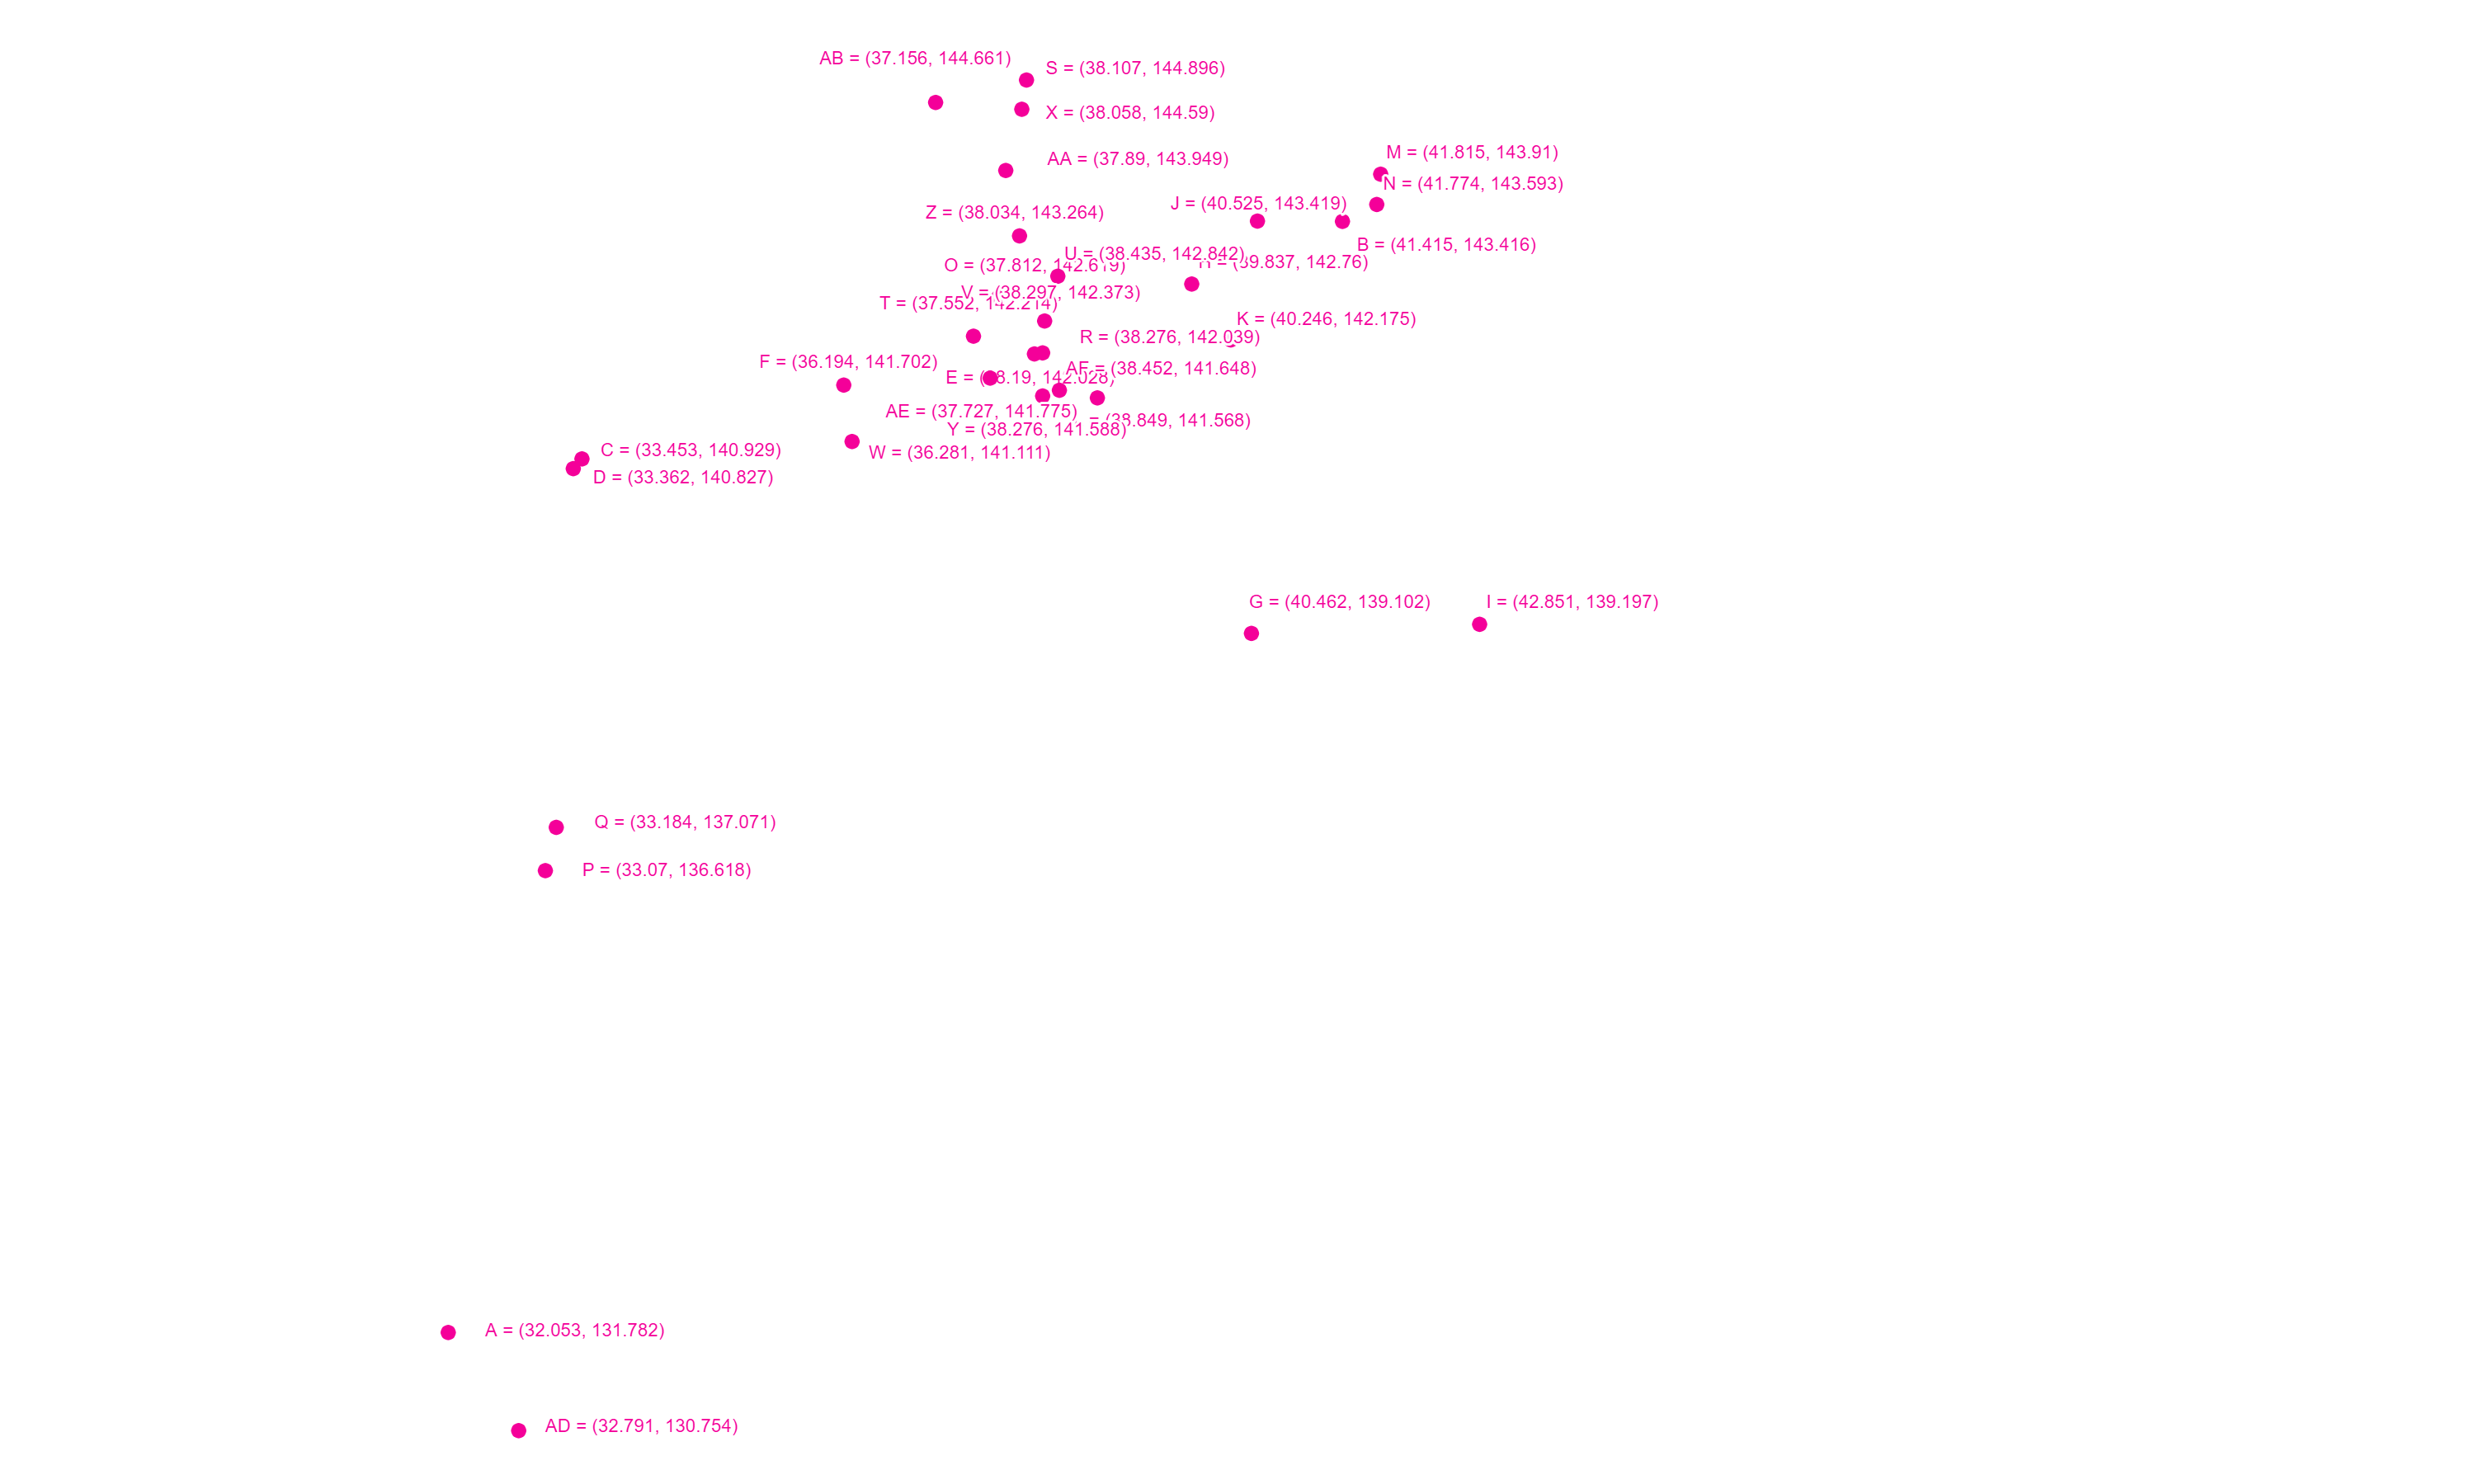

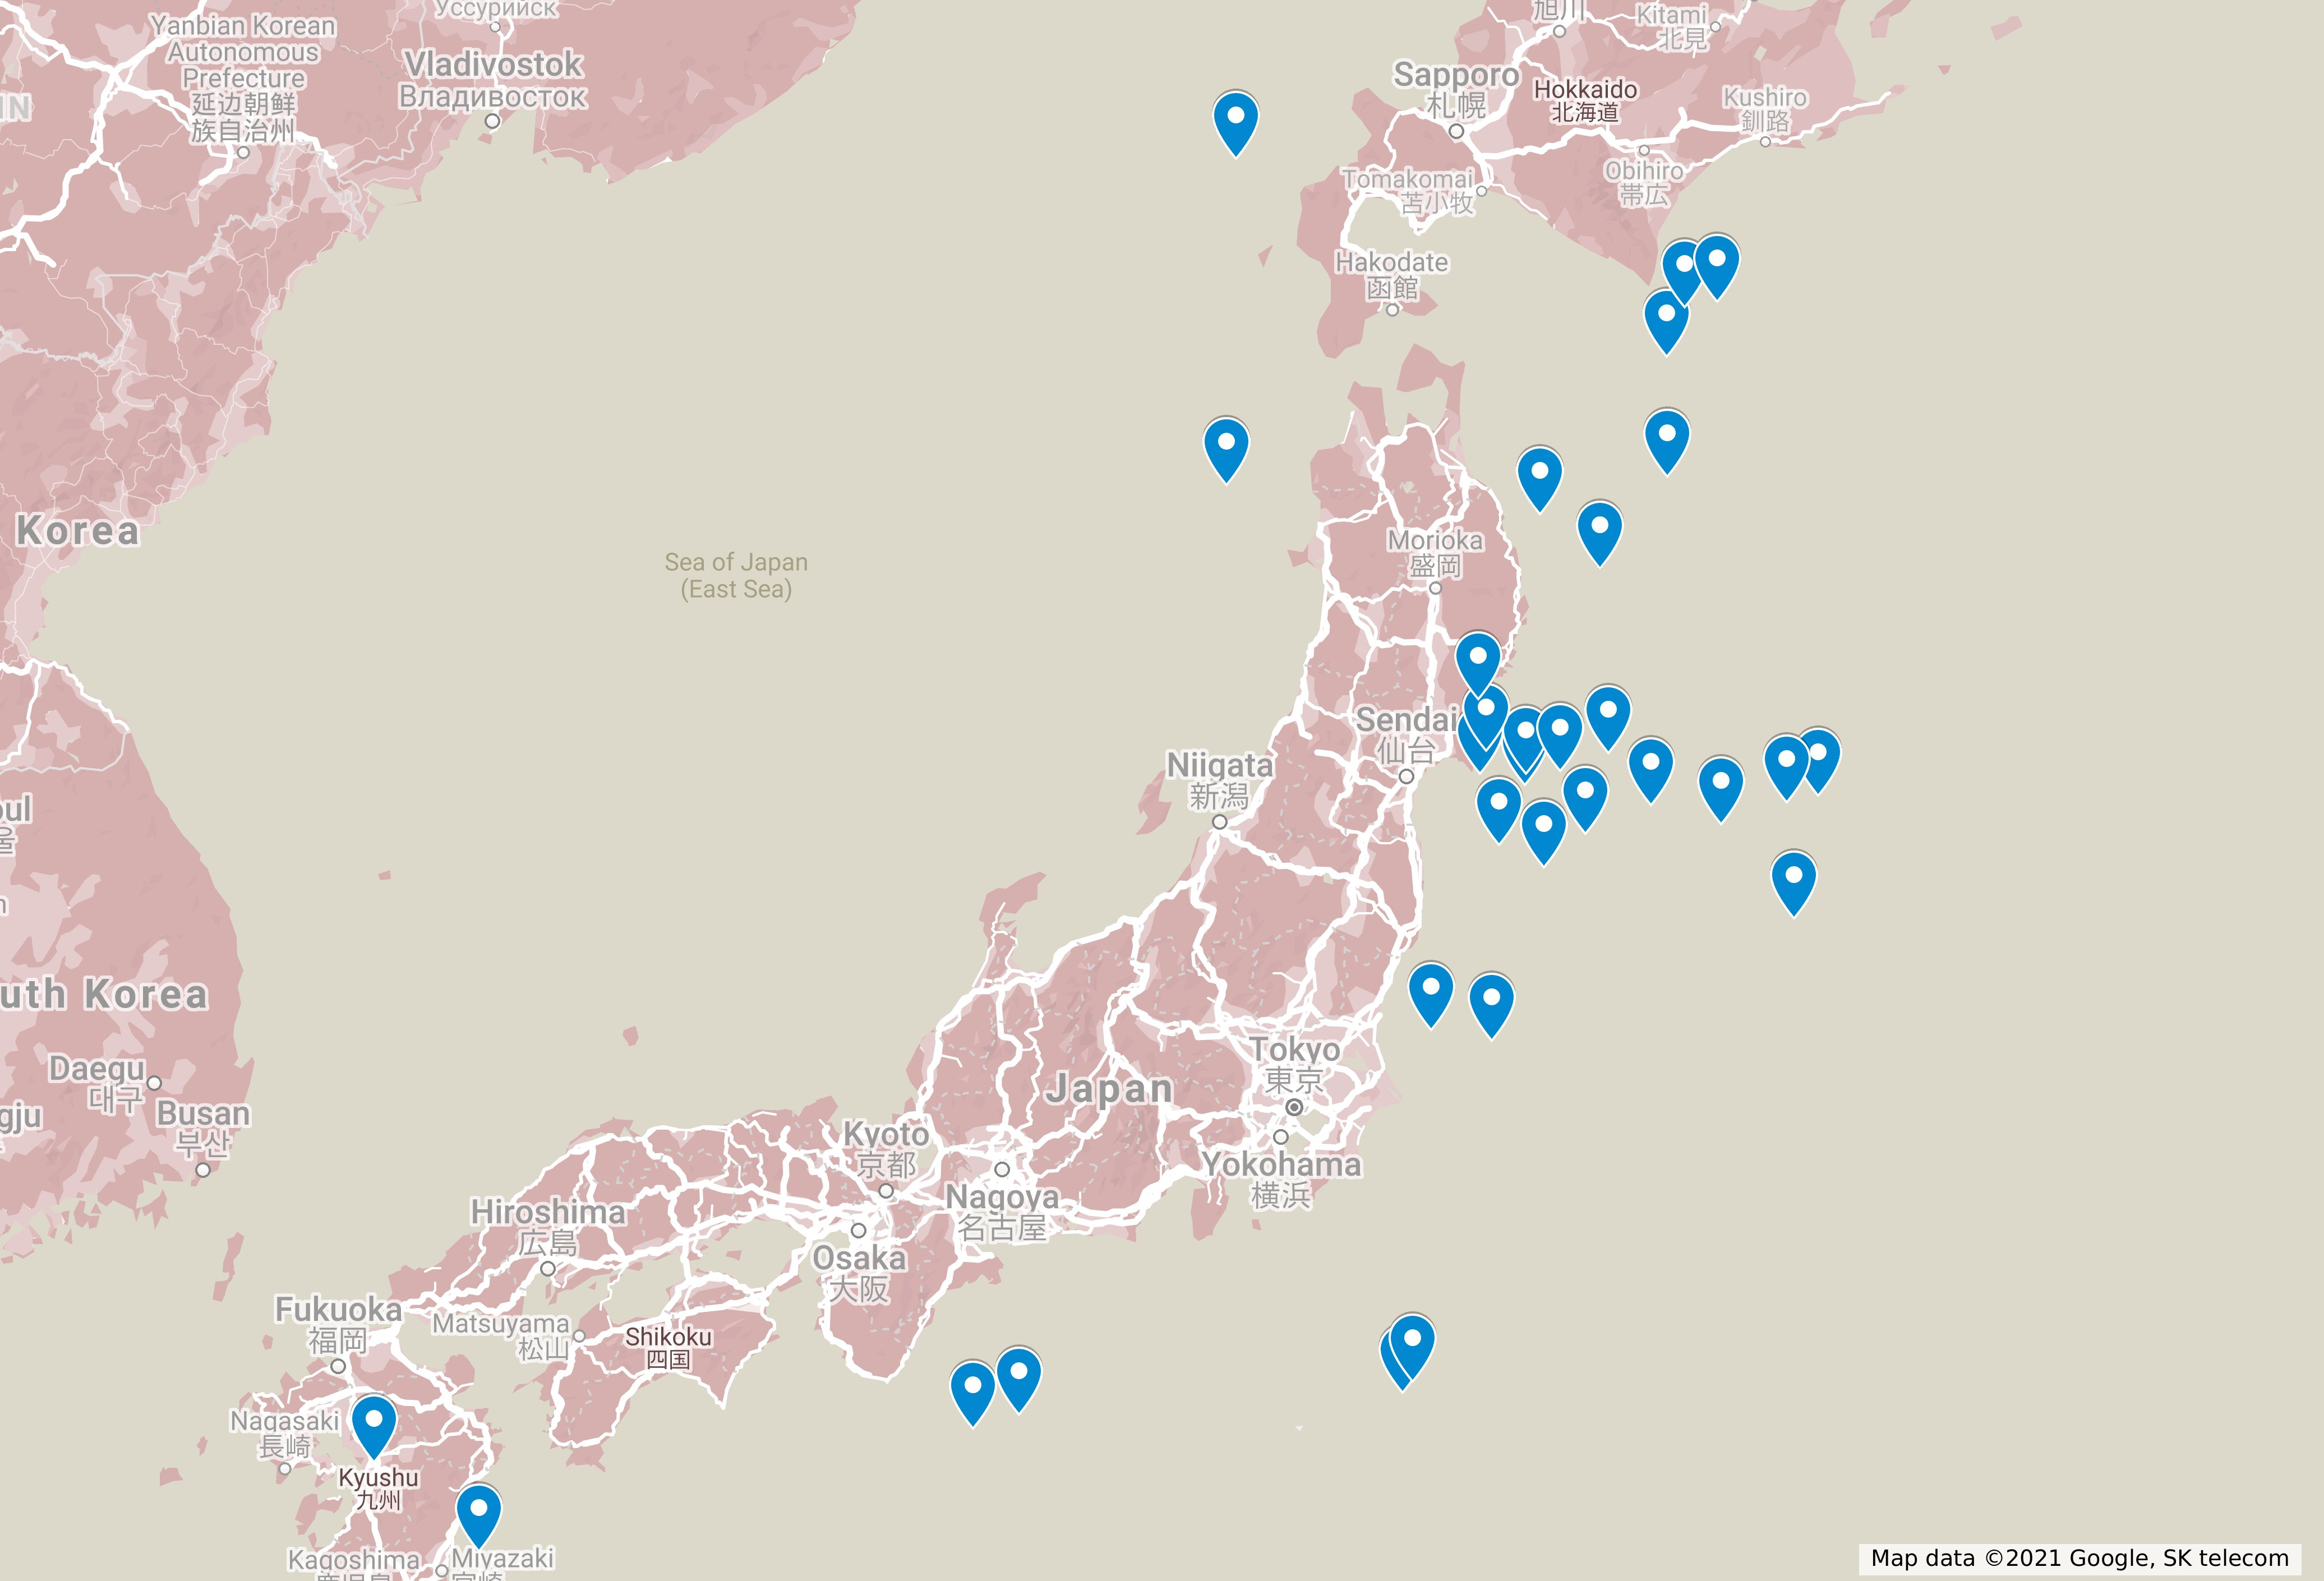

---

##**A geographical point is specified by the following four items:**##

ISO 6709:
*   First horizontal coordinate (y), such as latitude (negative number south of equator and positive north of equator)
*   Second horizontal coordinate (x), such as longitude (negative values west of Prime Meridian and positive values east of Prime Meridian)
*   Vertical coordinate, i.e. height or depth (optional)
---

##Orthodromic Distance:##

In [ ]:
import math
CenterOfJapan = (36.2048, 138.2529)
EuclideanDistance = list()
for i in DangerCoordinates:
    # Euclidean Distance (Then Geodesic on Great-circle)
    EuclideanDistance.append((math.sqrt((CenterOfJapan[0]-i[0])**2+(CenterOfJapan[1]-i[1])**2),i))
EuclideanDistance.sort()

---
Closest to the Center :

2.8591156062670637 (relative coordinates distance - converted to Kms below)

36.281 : 141.111

---
Farthest from the Center :

8.239281740540262 (relative coordinates distance - converted to Kms below)

32.7906 : 130.7543

---

Using this website https://gps-coordinates.org/distance-between-coordinates.php these radii were calculated.

CenterOfJapan = 36.2048, 138.2529

Ratio = 900 Kms

##Annulus:##

inner radius = 256.45 Kms

outer radius = 784.72 Kms



In [ ]:
del EuclideanDistance

##The seismic event treshold is set to M6, since M6 or greater earthquakes are often destructive.##

*   M6 or greater seismic events happening in the upcoming 30 days are ***positive samples***
*   Less than M6 seismic events are ***negative samples***

The seismic events superposition within N days are projected on the map and marked with a 1 if the largest earthquake’s magnitude in the upcoming 30 days is greater than or equal to 6. In the same way, negative samples were marked with a 0.

###According to the **Omori´s law**, aftershock activity is predictable.###

So, the earthquake events within the radius of 50 Km within 7 days after the occurrence of the M6+ main-shock must be deleted from the set.

[ Haven't done this ]

#Sampling:#

From the starting time of January 1, 1970, we got a sample every step forward 30 days. Finally, we got all samples in the dataset. The image size of each sample is 256 pixel length and 256 pixel width.

##Algorithm:##


*   Seismic event data acquisition. (check)
*   From 1970/1/1, count N days, look if M6 earthquake occur in N~N+30 day. If yes, it is a positive sample with a label '1'. If no, it is a negative sample with a label '0'.
*   All earthquake events within current N days are projected on the map as points with size and brightness depending on their magnitudes. Then, one sample is completed.
*   Step forward 30 days, repeat step 2 and 3, and generate a new sample until all the samples are completed.



---



The authors of the paper have declared that N=120 does the job (for Taiwan):

"*Using the past N days of seismic events to predict whether the largest earthquake magnitude in the upcoming 30 days is greater than M6, we found that we can get a relatively good result (0.303) when N = 120. We saw that we can not get the best result when N is too small or too large.*"

"*We think it is mainly due to the destructive earthquakes need a certain time preparation process. If N is too small( much less than the preparation process time), the model can not learn enough useful information and can not do a good prediction. Similarly, if N is too big, the model will be interfered by useless information and also can not do a good prediction.*"

In [ ]:
!mkdir SampleImages

In [ ]:
from matplotlib import pyplot as plt

* The distance from the center to any corner of the bounding square of Japan is ~ 1272.7922 Kms (necessary to normalize Sample image size).
* The bounding square of Japan has a width of 1800 Kms.
* These info helps us pinpoint a unified minimum and maximum latitude and longitude for all Samples.
* Latitude is basically the 'y' axis and every '1' unit of it is approximately 111.19 Kms.
* Longitude is basically the 'x' axis and every '1' unit of it is approximately 89.72 Kms.
* Using the website https://gps-coordinates.org/distance-between-coordinates.php a good approximation is found for the coordinatds of the bottom-left and the top-right side of the bounding square.
* Distance from center to both y and x is almost 9.9968
* Square's both width and height are 17.6 in size

spherecal end-points:

* 28.2048, 138.2529

* 36.2048, 148.2497

* 44.2048, 138.2529

* 36.2048, 128.2561

bounding-box diagonal end-points:

* 28.2048, 128.2561

* 44.2048, 148.2497


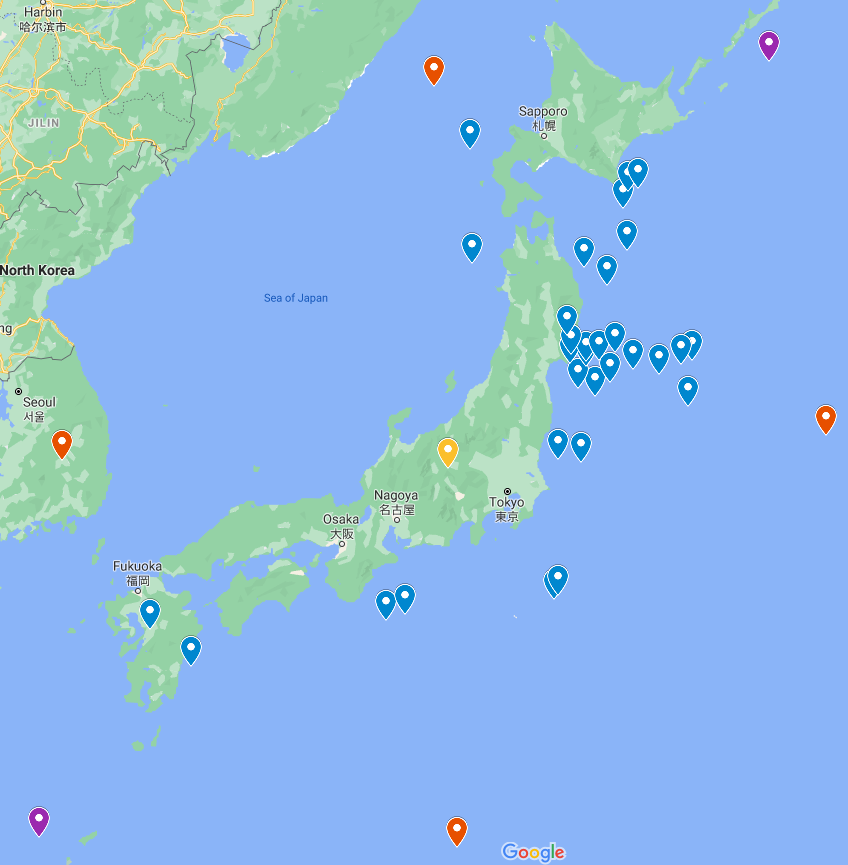

### Now it is needed to transform the bounding box of Japan into a normalized space with height and width of 2^10 ###
and then resize the image into a 256x256 pixels squared image to create the said "Samples"

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math

N_DAYS = 120 # worked for Taiwan at least
N_MTHS = int(N_DAYS / 30)   # N months - which is 4 months for a sample

C_YEAR = 1970 # current year
C_MNTH = 1    # current month
C_DAY  = 1    # current day
C_SAMPLE = list()
# C_SAMPLE = ['1970-1-1']
while C_YEAR != 2021:
    C_MNTH += N_MTHS
    if C_MNTH > 12:
        C_MNTH = 1
        C_YEAR += 1
    C_SAMPLE.append( (str(C_YEAR)+'-'+str(C_MNTH)+'-'+str(C_DAY), str(C_YEAR)+'-'+str(C_MNTH+1)) ) # a tuple of date chunks and 30 days label checking limit

def Sampling(z):
    color = (255,255,255) # since openCV uses BGR format instead of RGB:
    if float(FeaturesDict['MAGNITUDE'][z]) < 4.0:
        color = (0,255,0)
    elif float(FeaturesDict['MAGNITUDE'][z]) < 6.0:
        color = (0,255,255)
    else:
        color = (0,0,255)
    cv2.circle(image, (math.floor((float(FeaturesDict['LONGITUDE'][z])-128.2561)*64), math.floor((float(FeaturesDict['LATITUDE'][z])-28.2048)*51.21)), math.floor(float(FeaturesDict['MAGNITUDE'][z])*10/2), color, -1)

handmade_checking = list()
print(C_SAMPLE)
c = 0 # end condition for each sample
z = -1 # z but actually i : i is date so needed an integer to keep track of racords
image = np.ones((1024,1024,3),dtype=np.uint8) # black background
for i in FeaturesDict['DATE']:
    z += 1
    if (int(i.split('-')[0]) == int(C_SAMPLE[c][0].split('-')[0])) and int(i.split('-')[1]) <= int(C_SAMPLE[c][0].split('-')[1]): # checkin' the year
        Sampling(z)
    elif int(i.split('-')[0]) < int(C_SAMPLE[c][0].split('-')[0]):
        Sampling(z)
    else:
        # print("year", int(i.split('-')[0]), int(C_SAMPLE[c].split('-')[0]), "month", int(i.split('-')[1]), int(C_SAMPLE[c].split('-')[1]))
        if c < len(C_SAMPLE)-1:
            c += 1
        else:
            print(c, "End condition has been met!")
            break
        image = cv2.resize(image, (256,256))
        cv2.imwrite("SampleImages/Sample"+str(c)+".jpg", image)
        # cv2.imwrite("SampleImages/Sample"+i+"_Label0.jpg", image)
        # handmade_checking.append( (i,FeaturesDict['DATE'][z-1])) 
        image = np.ones((1024,1024,3),dtype=np.uint8) # black background

[('1970-5-1', '1970-6'), ('1970-9-1', '1970-10'), ('1971-1-1', '1971-2'), ('1971-5-1', '1971-6'), ('1971-9-1', '1971-10'), ('1972-1-1', '1972-2'), ('1972-5-1', '1972-6'), ('1972-9-1', '1972-10'), ('1973-1-1', '1973-2'), ('1973-5-1', '1973-6'), ('1973-9-1', '1973-10'), ('1974-1-1', '1974-2'), ('1974-5-1', '1974-6'), ('1974-9-1', '1974-10'), ('1975-1-1', '1975-2'), ('1975-5-1', '1975-6'), ('1975-9-1', '1975-10'), ('1976-1-1', '1976-2'), ('1976-5-1', '1976-6'), ('1976-9-1', '1976-10'), ('1977-1-1', '1977-2'), ('1977-5-1', '1977-6'), ('1977-9-1', '1977-10'), ('1978-1-1', '1978-2'), ('1978-5-1', '1978-6'), ('1978-9-1', '1978-10'), ('1979-1-1', '1979-2'), ('1979-5-1', '1979-6'), ('1979-9-1', '1979-10'), ('1980-1-1', '1980-2'), ('1980-5-1', '1980-6'), ('1980-9-1', '1980-10'), ('1981-1-1', '1981-2'), ('1981-5-1', '1981-6'), ('1981-9-1', '1981-10'), ('1982-1-1', '1982-2'), ('1982-5-1', '1982-6'), ('1982-9-1', '1982-10'), ('1983-1-1', '1983-2'), ('1983-5-1', '1983-6'), ('1983-9-1', '1983-10'), (

In [ ]:
# generating labels in Excel ( ͡° ͜ʖ ͡°)
# myfile = open('out.csv','a')
# for i in handmade_checking:
#     myfile.write(i[0] + ',' + i[1] + '\n')

In [ ]:
# Deleting Samples
# !rm -rf SampleImages

1. first run, colored images:

In [ ]:
# Zipping SAMPLEIMAGES FOLDER for download
!zip -r Samples_Colored.zip SampleImages

  adding: SampleImages/ (stored 0%)
  adding: SampleImages/Sample78.jpg (deflated 4%)
  adding: SampleImages/Sample129.jpg (deflated 6%)
  adding: SampleImages/Sample36.jpg (deflated 8%)
  adding: SampleImages/Sample34.jpg (deflated 8%)
  adding: SampleImages/Sample26.jpg (deflated 9%)
  adding: SampleImages/Sample142.jpg (deflated 5%)
  adding: SampleImages/Sample60.jpg (deflated 6%)
  adding: SampleImages/Sample2.jpg (deflated 43%)
  adding: SampleImages/Sample112.jpg (deflated 4%)
  adding: SampleImages/Sample67.jpg (deflated 6%)
  adding: SampleImages/Sample76.jpg (deflated 5%)
  adding: SampleImages/Sample11.jpg (deflated 6%)
  adding: SampleImages/Sample119.jpg (deflated 6%)
  adding: SampleImages/Sample138.jpg (deflated 5%)
  adding: SampleImages/Sample25.jpg (deflated 7%)
  adding: SampleImages/Sample127.jpg (deflated 7%)
  adding: SampleImages/Sample52.jpg (deflated 6%)
  adding: SampleImages/Sample64.jpg (deflated 7%)
  adding: SampleImages/Sample104.jpg (deflated 4%)
  addin

2. second run, omni-colored areas:

In [ ]:
# Zipping SAMPLEIMAGES FOLDER for download
# !zip -r Samples_notColored.zip SampleImages